# Part I - (Salaries Data Exploration)
## by (Michael Afolami)


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
# load in the dataset into a pandas dataframe
salaries_data = pd.read_csv('Salaries_ALTX.csv')

#### Assessing the Data

In [3]:
salaries_data.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,NaN
1,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,NaN
2,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,NaN
3,110538,John L Martin,Dept Head V,311298.55,0.00,0.00,89772.32,311298.55,401070.87,2014,San Francisco,NaN
4,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,NaN


In [4]:
#Check the shape of the dataset
salaries_data.shape

(148654, 12)

In [5]:
#Check other dataset info
print(salaries_data.info())
print (salaries_data.describe())
print(salaries_data.dtypes)
print ('The shape of the dataset is: ', salaries_data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
 11  Status            0 non-null       float64
dtypes: float64(7), int64(2), object(3)
memory usage: 13.6+ MB
None
                  Id        BasePay    OvertimePay       OtherPay  \
count  148654.000000  148045.000000  148650.000000  148650.000000   
mean    743

In [6]:
#CHeck for unique values
salaries_data.nunique()

Id                  148654
EmployeeName        110811
JobTitle              2159
BasePay             109489
OvertimePay          65998
OtherPay             83225
Benefits             98466
TotalPay            138486
TotalPayBenefits    142338
Year                     4
Agency                   1
Status                   0
dtype: int64

In [7]:
#CHeck for missing values
salaries_data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              148654
dtype: int64

In [8]:
pd.DataFrame.isna(salaries_data['Status'])

0         True
1         True
2         True
3         True
4         True
          ... 
148649    True
148650    True
148651    True
148652    True
148653    True
Name: Status, Length: 148654, dtype: bool

In [9]:
salaries_data['Status'].isna().sum()

148654

In [10]:
#Print out variables with missing values
na_counts = salaries_data[['BasePay', 'OvertimePay', 'OtherPay', 'Status']].isna().sum()
na_counts

BasePay           609
OvertimePay         4
OtherPay            4
Status         148654
dtype: int64

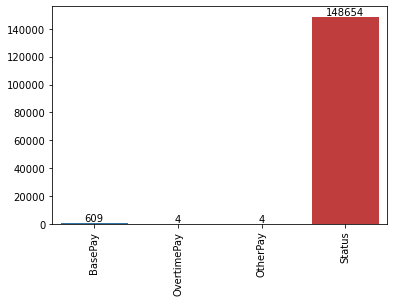

In [11]:
#visualize the atributes with missing values
sns.barplot(x=na_counts.index.values, y=na_counts)
plt.xticks(rotation=90)
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+7000, count, ha = 'center', va='top');

#### Of the 4 attributes with missing values, the 'Status' column is completely empty and does not contribute any significant information to the dataset. I will proceed and drop it. For the three other columns, I will do imputation with the mean.

### Cleaning

In [12]:
#Drop status column
salaries_data.drop(['Status'], axis=1, inplace=True)

In [13]:
salaries_data.head(2)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.0,82313.70,96570.66,339653.70,436224.36,2014,San Francisco
1,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,San Francisco


In [14]:
#Impute other columns with missing values with their mean values
salaries_data['BasePay'].fillna(salaries_data['BasePay'].mean(), inplace=True)
salaries_data['OvertimePay'].fillna(salaries_data['OvertimePay'].mean(), inplace=True)
salaries_data['OtherPay'].fillna(salaries_data['OtherPay'].mean(), inplace=True)

In [15]:
salaries_data['OvertimePay'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650    False
148651    False
148652    False
148653    False
Name: OvertimePay, Length: 148654, dtype: bool

In [16]:
salaries_data.sample(3)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
3150,114507,Julie C Rosenberg,"Manager IV, MTA",132308.28,0.00,1500.00,51106.01000,133808.28,184914.29000,2014,San Francisco
146475,33985,STEPHANIE VALDEZ,ORTHOPEDIC TECHNICIAN I,3583.40,0.00,0.00,25007.89315,3583.40,28591.29315,2011,San Francisco
31887,42493,Richard Archibald,EMT/Paramedic/Firefighter,110799.04,3787.05,12484.96,34641.82000,127071.05,161712.87000,2012,San Francisco


In [17]:
#Check for missing values after cleaning
salaries_data.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

In [18]:
salaries_data.shape

(148654, 11)

In [19]:
salaries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  float64
 4   OvertimePay       148654 non-null  float64
 5   OtherPay          148654 non-null  float64
 6   Benefits          148654 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


### What is the structure of your dataset?

> The dataset contains 148654 observations and 11 attributes. Out of the total 11 attributes, 3 are objects and 8 numerical variables. The unique number of years under study is 4 while Agency is 1. 

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest in my dataset is the TotalPayBenefits. I am interested in knowing which of the other variables mostly correlate with and how they influence the totalpaybenefits.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am thinking that the Benefits and BasePay will influence totalPayBenefits!

## Univariate Exploration

In [20]:
salaries_data.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000,148654.000000
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,99776.215128,2012.522643
std,42912.857795,42676.946745,11454.226449,8056.493470,13398.411899,50517.005274,61571.137996,1.117538
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37164.250000,33847.017500,0.000000,0.000000,22342.297500,36168.995000,52670.843287,2012.000000
50%,74327.500000,65092.190000,0.000000,811.350000,25007.893150,71426.610000,99067.660000,2013.000000
75%,111490.750000,94605.740000,4658.667500,4235.907500,33468.980000,105839.135000,138370.087500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,592603.323200,2014.000000


In [21]:
#To enablefurther analysis, I am storing the column names in varible name sal_cols
sal_cols = salaries_data.columns 
sal_cols

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency'],
      dtype='object')

In [22]:
#Define a function and a for loop for the column names to avoid repeating writing the same code
for i in sal_cols:
    def unigroupby (i, title, xlabel, ylabel):
        plt.figure(figsize=[12, 8])
        salaries_data[i].hist(bins=20)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()

### Please expand the analysis to describe in more detail each step of the analysis, for that you should start with the question that you want to answer, describe the analysis that you implemented, and describe the results, and the charts that depict the results. List your insights and explain how your findings support your insight.

### Question: How are the 'pay' variables in the dataset distributed? 

> The following charts will show the distribution of the OtherPay, BasePay, TotalPay, Benefits, and TotalPayBenefits

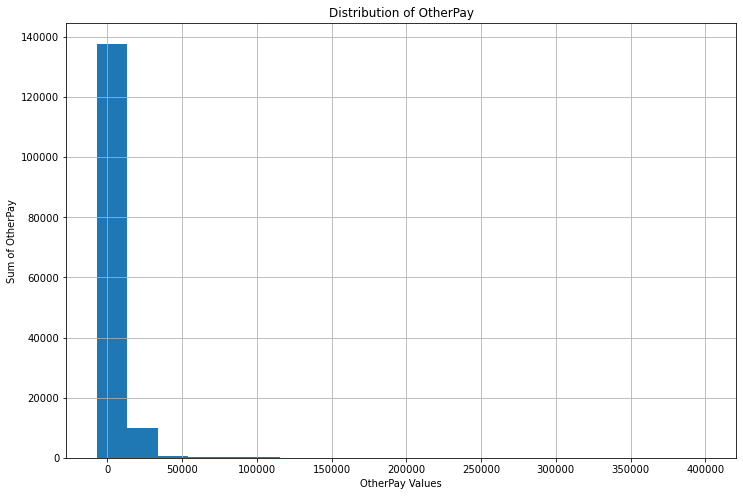

In [23]:
#This shows the distribution of 'OtherPays'
unigroupby('OtherPay', 'Distribution of OtherPay', 'OtherPay Values', 'Sum of OtherPay')

#### This chart shows that for "OtherPay", 75% of employees received about 4235 as their otherpay with an outlier that lies with the maximum value at about 400000.

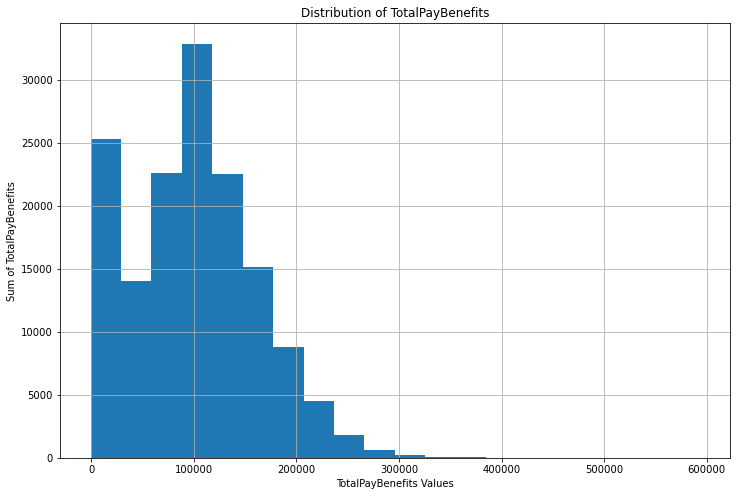

In [25]:
#This shows the distribution of 'TotalPayBenefits'
unigroupby('TotalPayBenefits','Distribution of TotalPayBenefits', 'TotalPayBenefits Values', 'Sum of TotalPayBenefits')

#### Although it extends to up to 600,000, TotalPayBenefits for most employees - 75% - is around 140,000

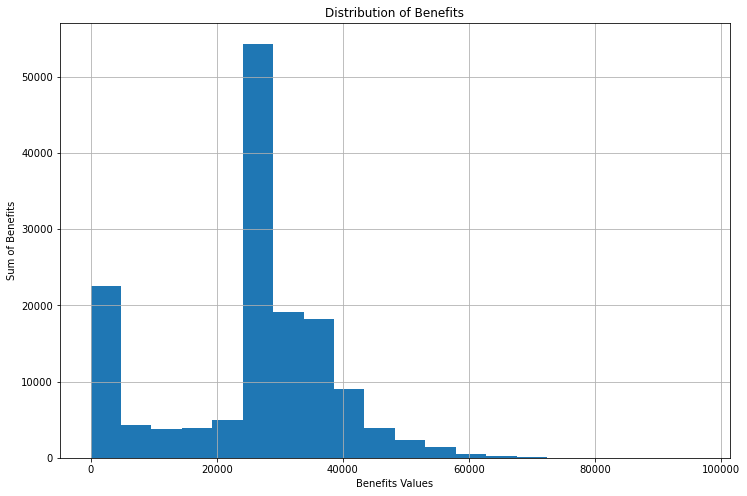

In [26]:
#This shows the distribution of 'Benefits'
unigroupby('Benefits','Distribution of Benefits', 'Benefits Values', 'Sum of Benefits')

#### Benefit for the majority of the employees is between 20,000 and 40,000, with the highest benefitting employee receiving about 100,000

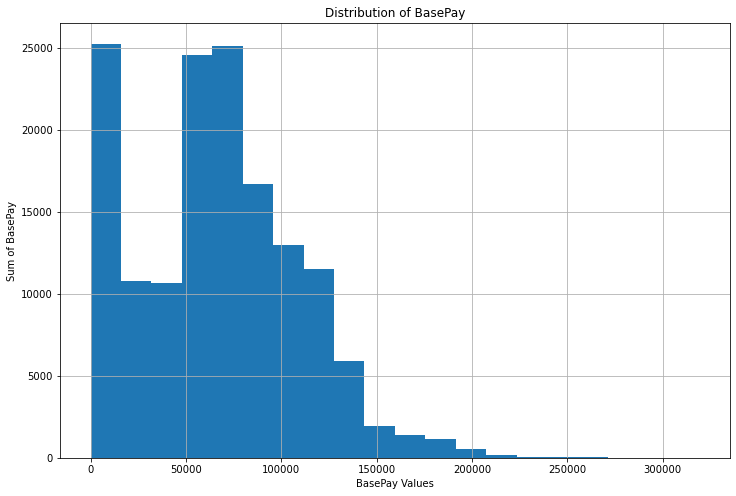

In [27]:
#This shows the distribution of 'BasePay'
unigroupby('BasePay', 'Distribution of BasePay', 'BasePay Values', 'Sum of BasePay')

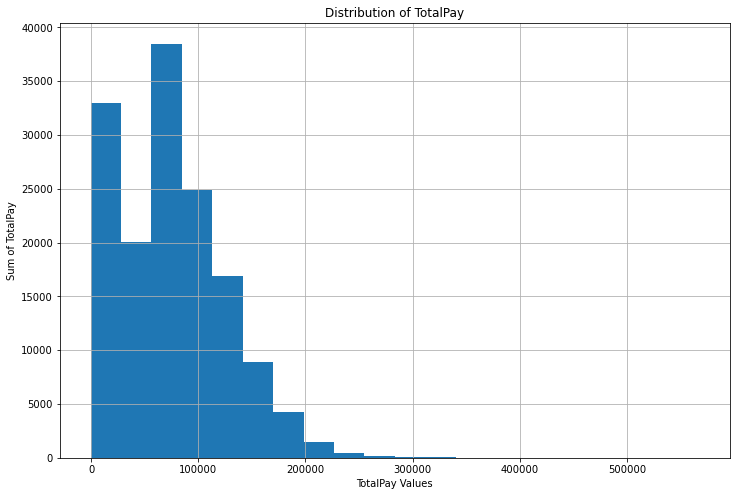

In [28]:
#This shows the distribution of 'TotalPay'
unigroupby('TotalPay', 'Distribution of TotalPay', 'TotalPay Values', 'Sum of TotalPay')

#### This is a salary attribute. It appears skewed to the right. It will make sense to check the JobTitle earning the highest pays in the bivariate and multivariae sections

#### Question: How do salaries compare by year?

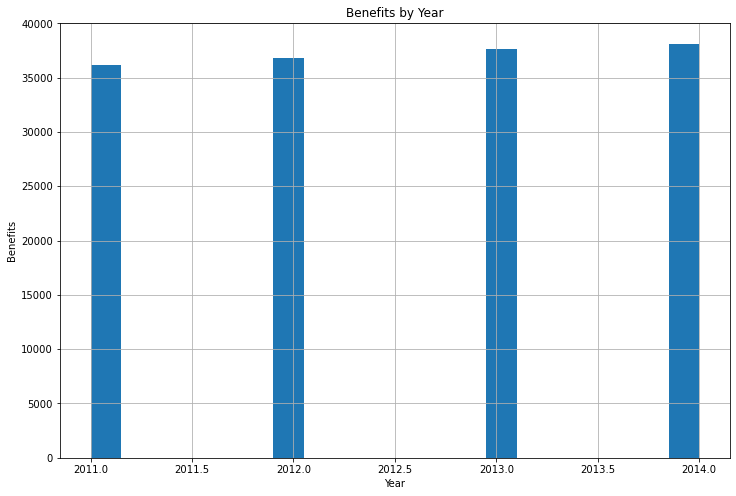

In [29]:
unigroupby ('Year', 'Benefits by Year', 'Year', 'Benefits')

#### The plot shows that benefits increases as the year progresses

#### Question: What are the top most common job titles

In [57]:
toptitle = salaries_data['JobTitle'].value_counts().head(10)

Text(0, 0.5, 'count of job titles')

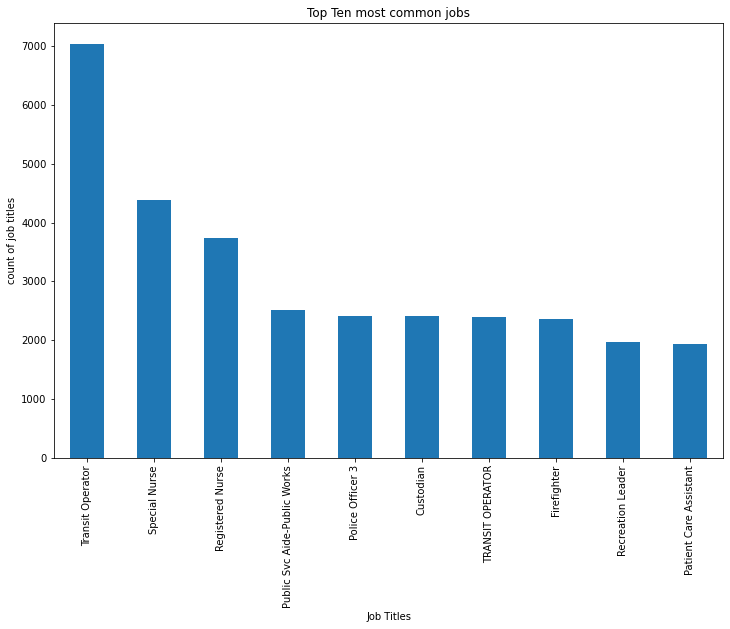

In [58]:
plt.figure(figsize=[12,8])
toptitle.plot(kind='bar')
plt.title('Top Ten most common jobs')
plt.xlabel('Job Titles')
plt.ylabel ('count of job titles')

#### The graph above shows the 10 top ranking job titles

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since this is a salary dataset, I kind of expected the skewness that came up across almost all the variables. Salaries vary according to several factors. Hence, the variables explored did not need any transformation in my opinion."

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I had done this before beginning the univariate analysis! I dropped 'status' because it contained 0 values and of course does not contribute to the analysis.

## Bivariate Exploration


#### One important rationale for this analysis is to see how much the other pay variables correlate with the TotalPaBenefits variable for employees. To fin d out, a correlation matrix showing the correlation coefficients for the variables is done below.

In [62]:
#Check the correlation between the remainder variables in the dataset
salaries_data.corr()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
Id,1.000000,-0.204628,-0.081502,-0.100399,-0.229712,-0.211478,-0.223498,0.968171
BasePay,-0.204628,1.000000,0.266633,0.283760,0.806665,0.950514,0.955402,0.033737
OvertimePay,-0.081502,0.266633,1.000000,0.316592,0.268539,0.504844,0.472644,0.027886
OtherPay,-0.100399,0.283760,0.316592,1.000000,0.203621,0.470482,0.430324,-0.002499
Benefits,-0.229712,0.806665,0.268539,0.203621,1.000000,0.782687,0.859777,-0.027393
TotalPay,-0.211478,0.950514,0.504844,0.470482,0.782687,1.000000,0.990785,0.032090
TotalPayBenefits,-0.223498,0.955402,0.472644,0.430324,0.859777,0.990785,1.000000,0.020368
Year,0.968171,0.033737,0.027886,-0.002499,-0.027393,0.032090,0.020368,1.000000


<AxesSubplot:>

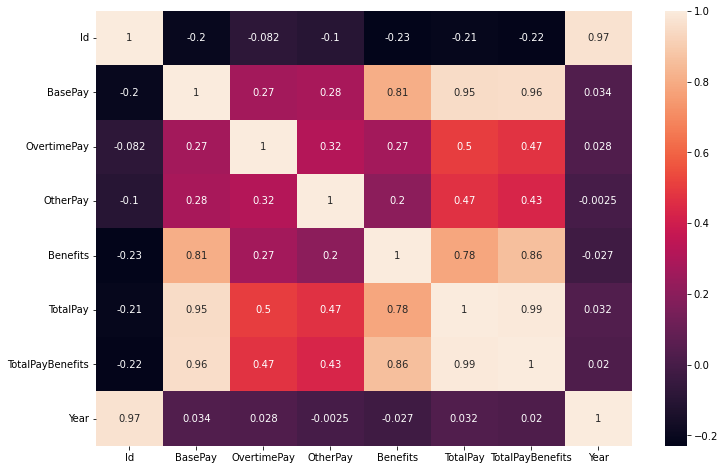

In [63]:
#Visualize correlation between the variables
plt.figure(figsize=[12, 8])
sns.heatmap(salaries_data.corr(), annot=True)

#### As the heatmap shows, 'id' and 'year' columns have negative and insignificant correlation respectively with our target variable. TotalPay with .99 coeff strongly correlates with TotalPayBenefits. This is interesting insight and kind of expected, because TotalPay is the sum of the BasePay and other pay apart from 'Benefits' that each employee receives. This means that when the TotalPay is summed up with Benefits, it gives TotalPayBenefits. So, an increase in TotalPay will denote an increase in TotalPayBenefits
##### For pairplot, I will be using only those columns with significant correlation values.

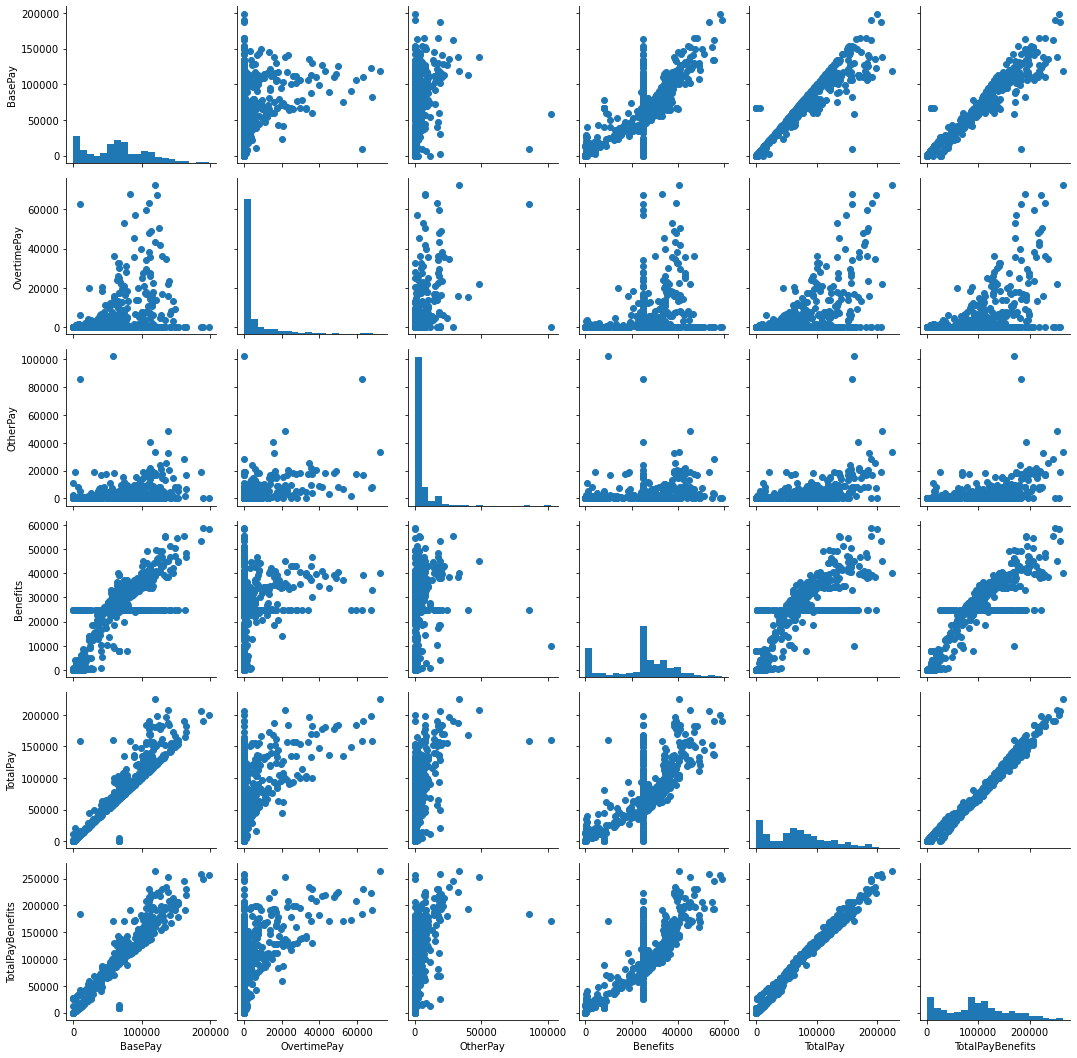

In [34]:
# Specify the column names because they render faster and to avoid overplotting
numeric_vars = ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']
samples = np.random.choice(salaries_data.shape[0], 500, replace = False)
diamonds_samp = salaries_data.loc[samples,:]

g = sns.PairGrid(data = diamonds_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

##### From the pairplot, the correlation revealed by the heatmap is further validated as 'TotalPay' , 'BasePay', and 'Benefits' appear to be positively correlated with 'TotalPayBenefits'

#### Question: what is the relationship between TotalPayBenefits and BasePay?

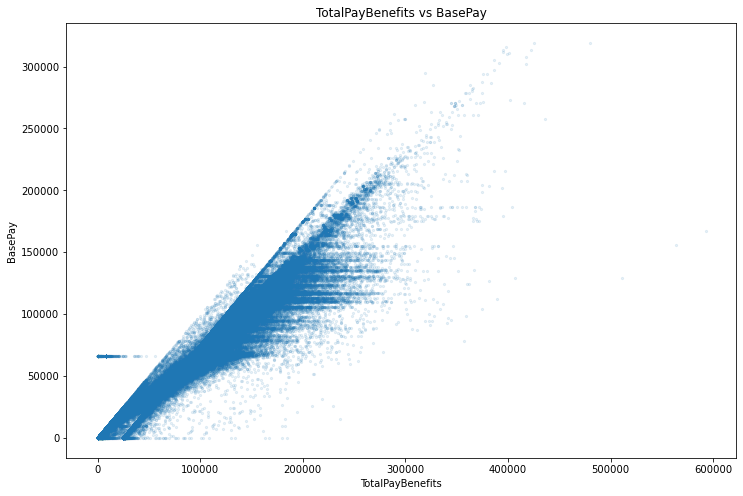

In [35]:
plt.figure(figsize=[12,8])
plt.scatter(data=salaries_data, x='TotalPayBenefits', y = 'BasePay', alpha=0.1, s=5)
plt.title('TotalPayBenefits vs BasePay')
plt.xlabel('TotalPayBenefits')
plt.ylabel('BasePay')
plt.show()

##### Recall that the heatmap had pegged the correlation between these variables at .96, which indicates a high statistical signifcance. This scatterplot attests to the positive relationship between 'Totalpaybenefits' and 'BasePay'. The higher the BasePay of an employee, the higher the TotalPayBenefits of that employee.

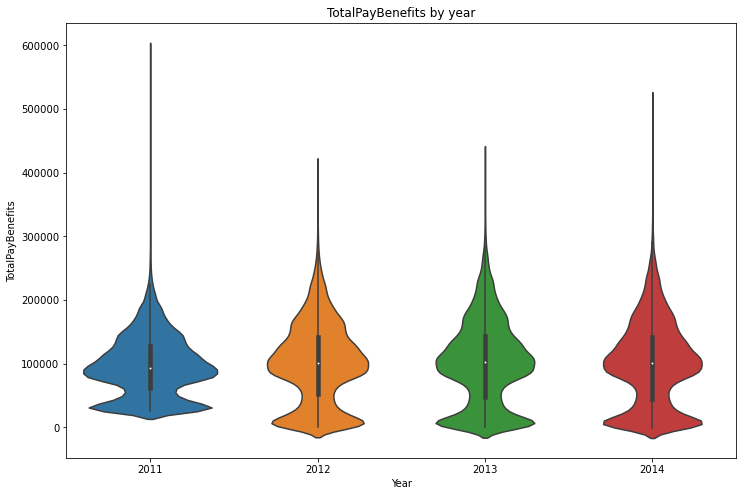

In [36]:
#Check TotalPayBenefits by year
plt.figure(figsize=[12,8])
sns.violinplot(data = salaries_data, x = 'Year', y = 'TotalPayBenefits')
plt.title('TotalPayBenefits by year')
plt.xlabel('Year')
plt.ylabel('TotalPayBenefits')
plt.show()

##### This violinplot shows that TotalPayBenefits increase every new year. The following barchart will suggest whether increase in the number of emploees or job titles every year affects TotalPayBenefits

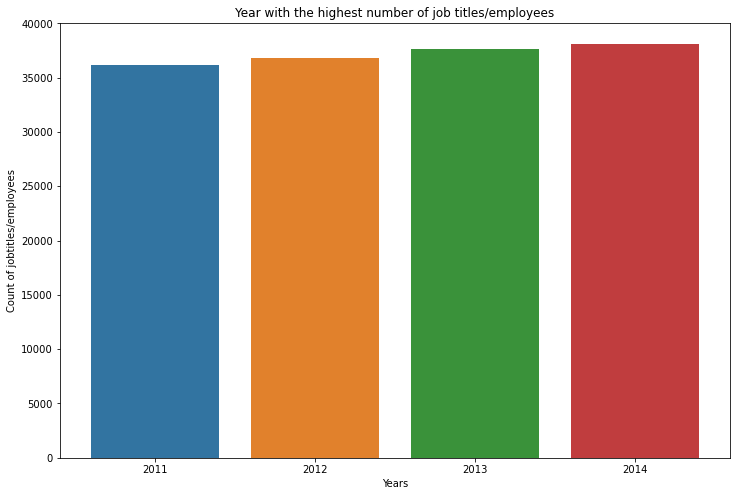

In [37]:
Size = salaries_data[['JobTitle','Year']].groupby(['Year'], as_index=False).sum()
Size.sort_values(by=['JobTitle'],ascending=False).head(10)
plt.figure(figsize=(12,8))
sns.countplot(x='Year', data=salaries_data)
plt.title('Year with the highest number of job titles/employees')
plt.xlabel('Years')
plt.ylabel('Count of jobtitles/employees')
plt.plot()
plt.show()

##### The bar chart above showing the number of job titles/employees supports the assumption that TotalPayBenefits increase by the year due to increase in the number of employees

<AxesSubplot:xlabel='Year', ylabel='Benefits'>

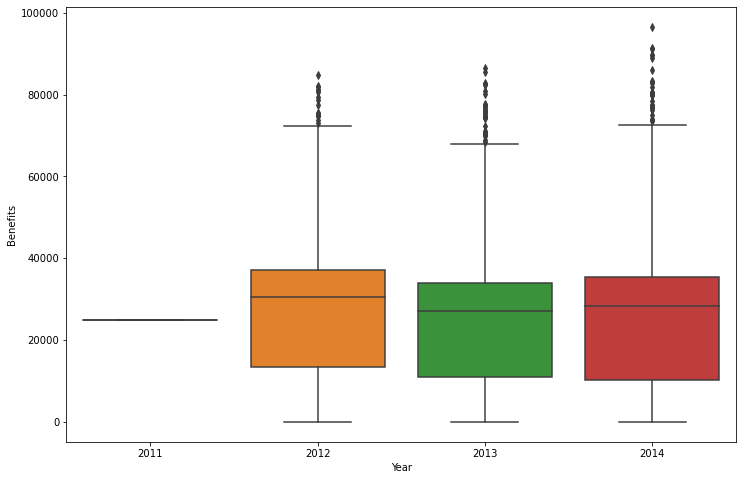

In [38]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Year', y='Benefits', data=salaries_data)

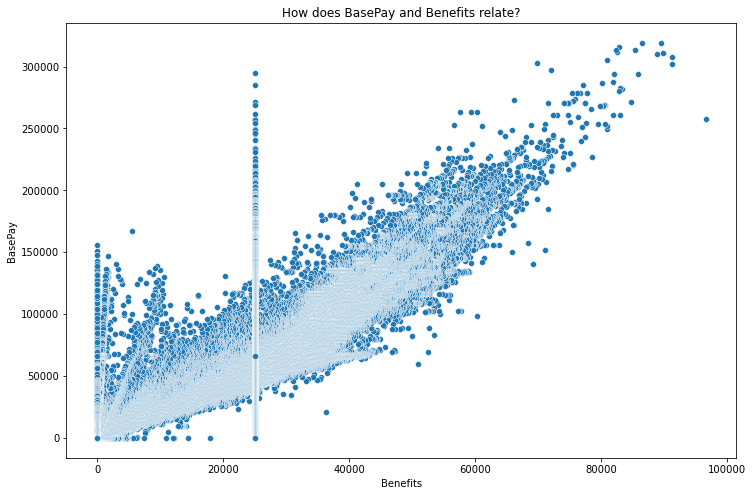

In [39]:
plt.figure(figsize=(12,8))
sns.scatterplot(x= salaries_data.Benefits, y = salaries_data.BasePay)
plt.title('How does BasePay and Benefits relate?')
plt.xlabel('Benefits')
plt.ylabel('BasePay')
plt.show()

##### The higher an employee's BasePay was, the higher his Benefits

In [40]:
def multigroupby (xvar1, xvar2, title, xlabel, ylabel):
    newdf.groupby([xvar1, xvar2])['No-show'].mean().plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot()
    plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The target variable was influenced by any change in the other numerical variables, and year! Unsurprisingly, the higher an employee's BasePay was, the higher their TotalPayBenefits was.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes! Year 2014 recorded higher values with regards to TotalPayBenefits, and this is owing to the increase in the number of employees. So, the sum of salaries paid per year will be affected by the number of employees

## Multivariate Exploration

> The following plots will futher explore the multiple relationships between the variables in the salaries dataset and the target variable 'TotalPayBenefits'. Since it has been earlier established that as year goes forward, so does the pays go higher, the charts will provide visualization of this fact.

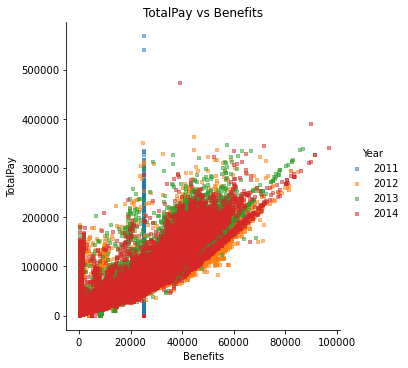

In [41]:
g = sns.FacetGrid(data = salaries_data, hue = 'Year', height = 5)
g.map(plt.scatter, 'Benefits', 'TotalPay', marker=",", alpha=0.5, s=9)
g.add_legend()
plt.title('TotalPay vs Benefits')
plt.show()

#### In 2011, Benefits for each employee was the same even despite the variation in TotalPay, TotalPayBenefits and the other pays. This is not the case for other years where there is a positive corellation between Benefits and other pay variables.

Text(0.5, 1.0, 'TotalPayBenefits vs Benefits')

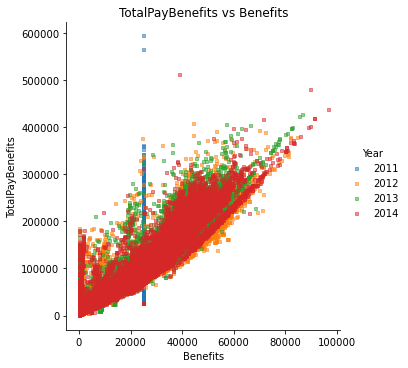

In [64]:
g = sns.FacetGrid(data = salaries_data, hue = 'Year', height = 5)
g.map(plt.scatter, 'Benefits', 'TotalPayBenefits', marker=",", alpha=0.5, s=9 )
g.add_legend()
plt.title('TotalPayBenefits vs Benefits')

Text(0.5, 1.0, 'OtherPay vs Benefits')

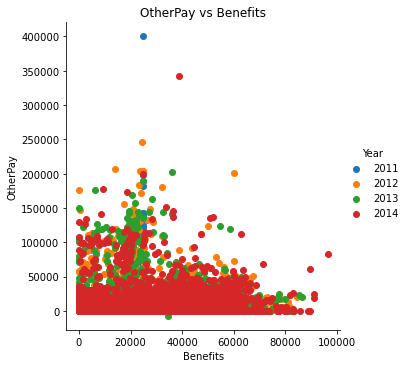

In [43]:
g = sns.FacetGrid(data = salaries_data, hue = 'Year', height = 5)
g.map(plt.scatter, 'Benefits', 'OtherPay')
g.add_legend()
plt.title('OtherPay vs Benefits')

Text(0.5, 1.0, 'OvertimePay vs TotalPayBenefits')

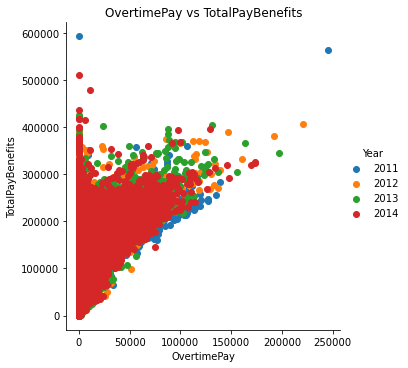

In [44]:
g = sns.FacetGrid(data = salaries_data, hue = 'Year', height = 5)
g.map(plt.scatter, 'OvertimePay', 'TotalPayBenefits')
g.add_legend()
plt.title('OvertimePay vs TotalPayBenefits')

Text(0.5, 1.0, 'TotalPay vs TotalPayBenefits')

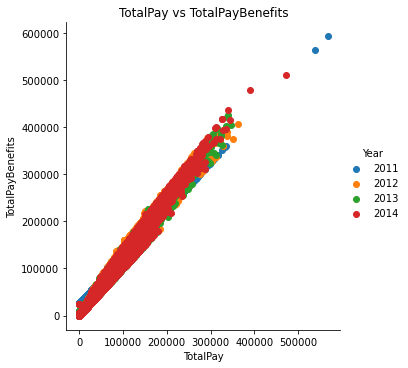

In [45]:
g = sns.FacetGrid(data = salaries_data, hue = 'Year', height = 5)
g.map(plt.scatter, 'TotalPay', 'TotalPayBenefits')
g.add_legend()
plt.title('TotalPay vs TotalPayBenefits')

#### As earlier detected, TotalPay and TotalPayBenefits have a .99 correlation, which indicates that the higher an employee's totalpay, the higher their totalpaybenefits.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Some of the insights gleaned include:
   
   1. An employee's basepay will most likely affect their benefits and total pay
    
   2. Across all the charts, year 2014 has the highest values and this is mostly due to the increase in the number of employees as revealed in the bar chart under univariate exploration.
### Were there any interesting or surprising interactions between features?

> As the year rises, totalpaybenefits increases, and so does totalpay, thus maintaining a close relationship and a strong positive correlation. I would not have thought that years would have an effect on how much is paid as salary, but as I have opined, as long as there is no noticeable attrition and more employees are employed yearly, then salaries are meant to increase!

## Conclusions

   >TotalPayBenefits and TotalPay has a correlation coefficient of .99 making it highly positively correlated. This is anticipated becasuse totalpaybenefits is the sum of basepay plus other pays which make up the total pay.


In [46]:
salaries_data.to_csv('salaries.csv')